Author: Hanif Zaki Nur Fauzi

# Import Libraries

In [82]:
# library manipulasi data
import pandas as pd
import numpy as np

# librray data preprocessing
from sklearn.preprocessing import LabelEncoder

# library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]

# Load Dataset

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Digifest Rakamin/loan_customer (1).csv')
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [85]:
# quick look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

**Dari informasi diatas, kami mempunyai data dengan 621 baris dan 17 kolom. Dengan 2 kolom yang type data nya tidak sesuai. Selain itu terdapat 10 kolom yang memiliki missing value.**

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
phone_number,569.0,5.468552e+11,1.987860e+11,6.281101e+10,6.281140e+11,6.281343e+11,6.285665e+11,6.287799e+11
applicant_income,612.0,5.681549e+03,9.056454e+03,1.500000e+02,2.874500e+03,3.812500e+03,5.815750e+03,1.705780e+05
coapplicant_income,621.0,1.616874e+03,2.915075e+03,0.000000e+00,0.000000e+00,1.167000e+03,2.302000e+03,4.166700e+04
loan_amount,621.0,1.451337e+05,8.401112e+04,9.000000e+03,1.000000e+05,1.250000e+05,1.650000e+05,7.000000e+05
loan_term_month,621.0,3.426087e+02,6.409084e+01,1.200000e+01,3.600000e+02,3.600000e+02,3.600000e+02,4.800000e+02
loan_term_year,621.0,2.855072e+01,5.340903e+00,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,4.000000e+01
credit_history,570.0,8.421053e-01,3.649626e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [87]:
df.describe(include = 'object').T

,count,unique,top,freq
loan_id,621,616,LP002277,2
birth_date,572,541,1987-10-18,2
gender,608,2,Male,495
married,618,2,Yes,403
dependents,605,4,0,349
education,620,2,Graduate,485
self_employed,588,2,No,506
has_credit_card,88,2,no,52
property_type,620,3,apartment,235
loan_status,621,2,APPROVE,426


# Data Cleansing

## Handling missing values

In [88]:
# cek nilai null
df.isna().sum()/len(df)*100

loan_id                0.000000
birth_date             7.890499
phone_number           8.373591
gender                 2.093398
married                0.483092
dependents             2.576490
education              0.161031
self_employed          5.314010
applicant_income       1.449275
coapplicant_income     0.000000
loan_amount            0.000000
loan_term_month        0.000000
loan_term_year         0.000000
credit_history         8.212560
has_credit_card       85.829308
property_type          0.161031
loan_status            0.000000
dtype: float64

<Axes: >

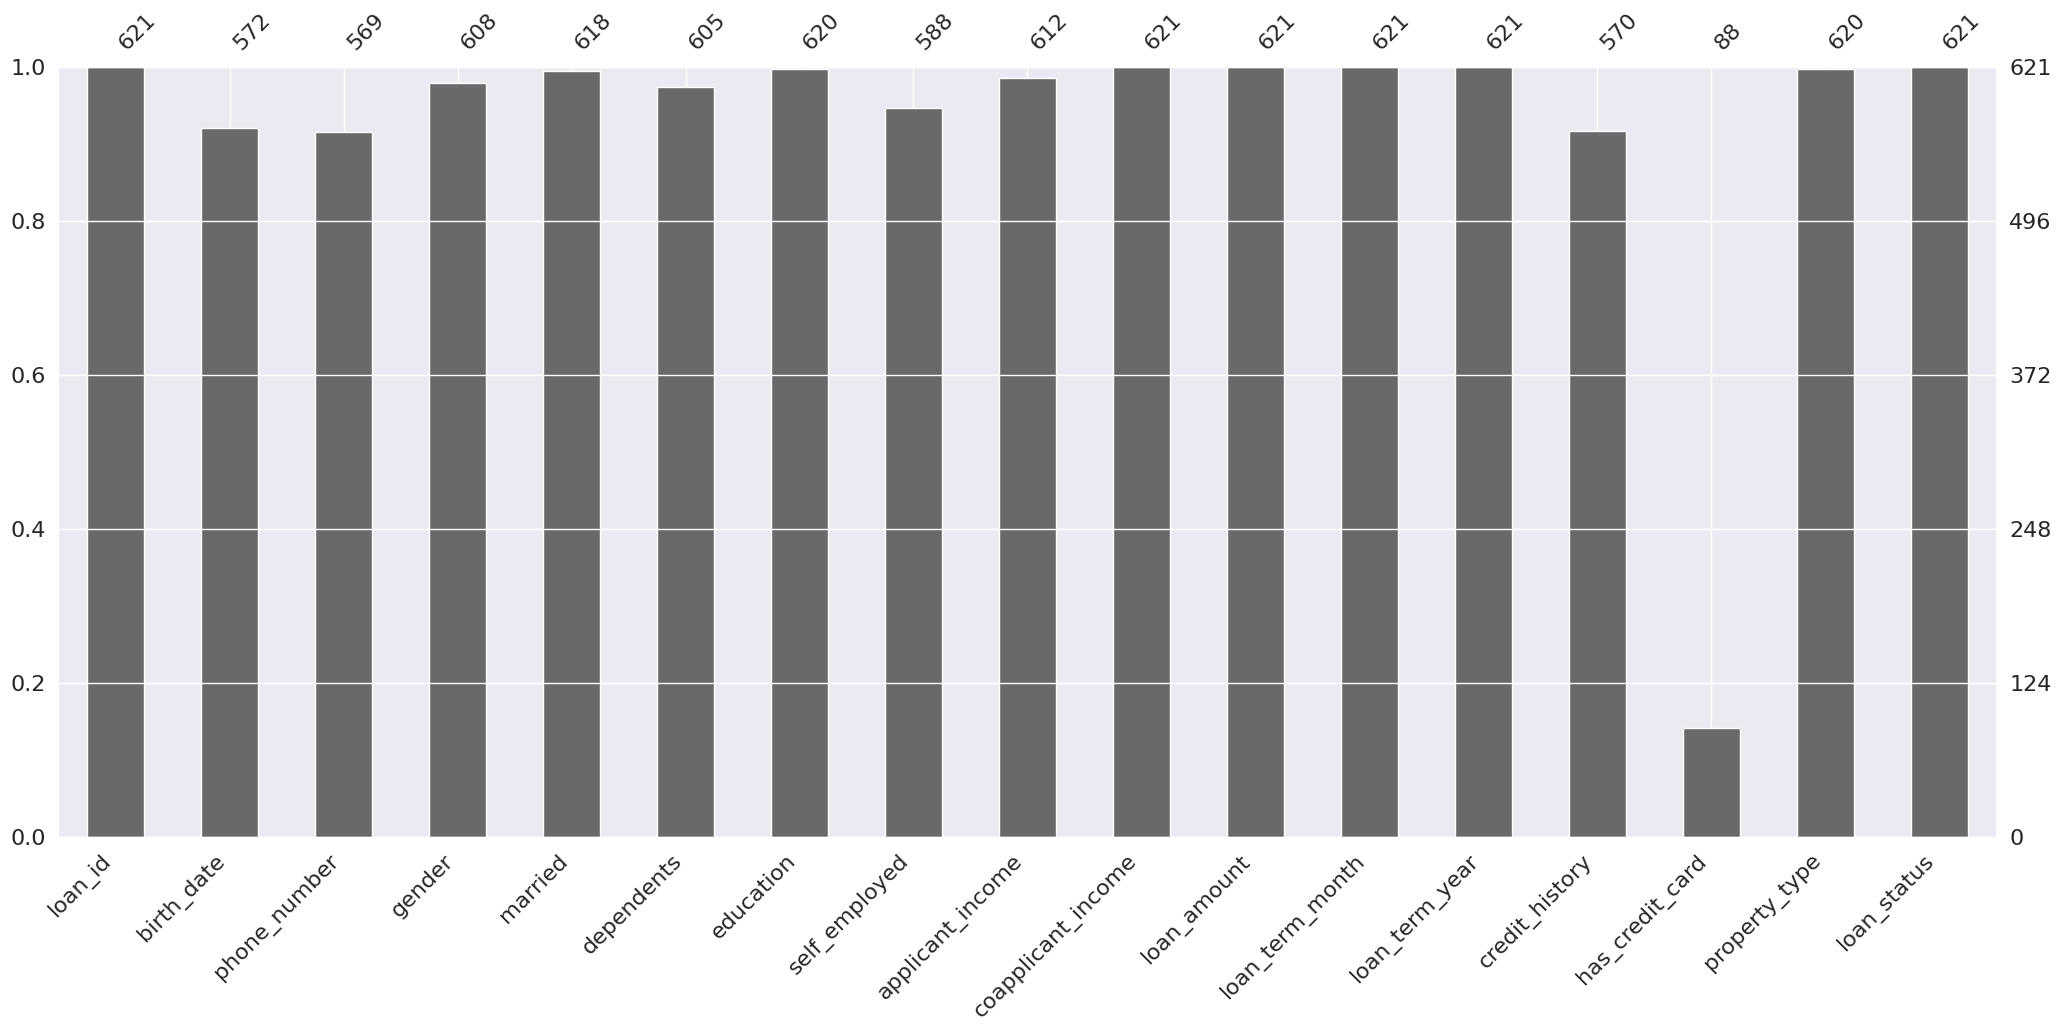

In [89]:
import missingno as msno

msno.bar(df)

**Handling Approach:**
1. Kolom has_credit_card dan phone_numberakan dilakukan drop kolom karena miss value nya lebih dari 85% sehingga berisiko bias apabila dilakukan handling.
2. Kolom birth_date akan dilakukan drop miss value karena kami tidak mempunyai informasi yang benar atau mendekati kebenaran.
2. Kolom gender, married, education, dependents, self_employed, credit_history, dan property_type akan dihandling dengan nilai modus karena kolom tersebut berbentuk kategorik.
3. Kolom applicant_income akan dihandling menggunakna nilai median karena kolom tersebut terdapat nilai outlier dan kami tidak akan menghilangkan nilai outlier karena tidka ingin kehilangan informasi dari nasabah tersbeut.

In [90]:
# handling kolom has_credit_card
df.drop(columns = 'has_credit_card', inplace = True)

# handling kolom birth_date
df.dropna(subset='birth_date', axis=0, inplace=True)

# handling kolom phone_number
df.drop(columns = 'phone_number', inplace = True)

# handling kolom gender
mode_gender = df['gender'].mode()[0]
df['gender'].fillna(mode_gender, inplace = True)

# handling married
mode_married = df['married'].mode()[0]
df['married'].fillna(mode_married, inplace = True)

# handling education
mode_education = df['education'].mode()[0]
df['education'].fillna(mode_education, inplace = True)

# handling self_employed
mode_selfemployed = df['self_employed'].mode()[0]
df['self_employed'].fillna(mode_selfemployed, inplace = True)

# handling property_type
mode_propertytype = df['property_type'].mode()[0]
df['property_type'].fillna(mode_propertytype, inplace = True)

# handling dependents
df['dependents'].fillna(0, inplace = True)

# handling credit_history
df['credit_history'].fillna(1.0, inplace = True)

# handling applicant_income
median_applicantincome = df['applicant_income'].median()
df['applicant_income'].fillna(median_applicantincome, inplace = True)

In [91]:
# validasi miss value
df.isna().sum()

loan_id               0
birth_date            0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

## Handling type data

In [92]:
# handling kolom birth_date
df['birth_date'] = pd.to_datetime(df['birth_date'])

# handling kolom credit_history
df['credit_history'] = df['credit_history'].astype(int)

## Handling duplicated data

In [93]:
# cek data duplikat
df['loan_id'].duplicated().sum()

5

In [94]:
# handling data duplikat
df.drop_duplicates(inplace=True)

In [95]:
# validasi data duplikat
df['loan_id'].duplicated().sum()

0

## Handling Outlier

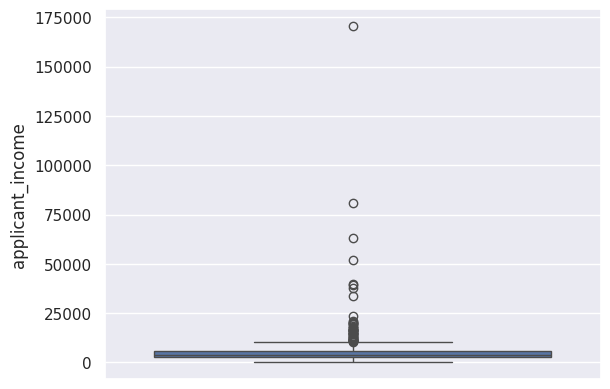

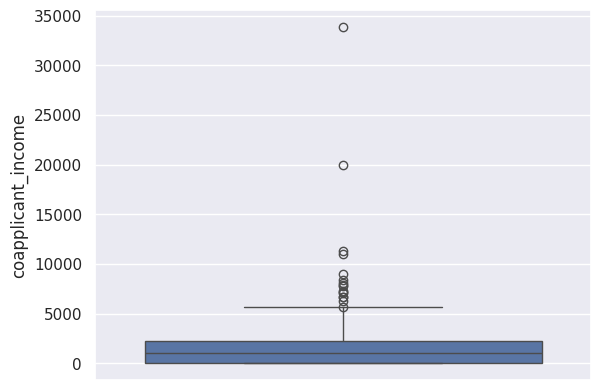

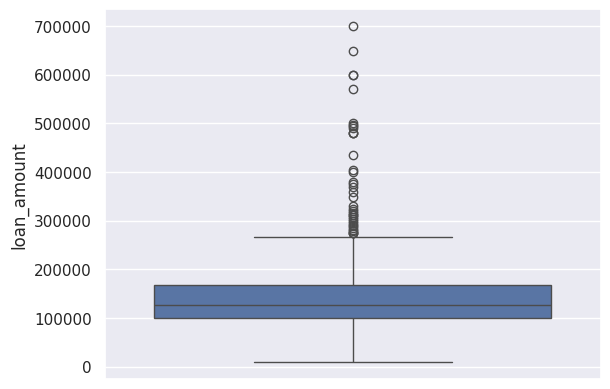

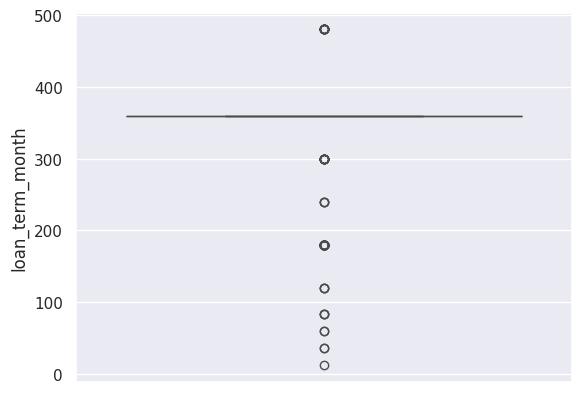

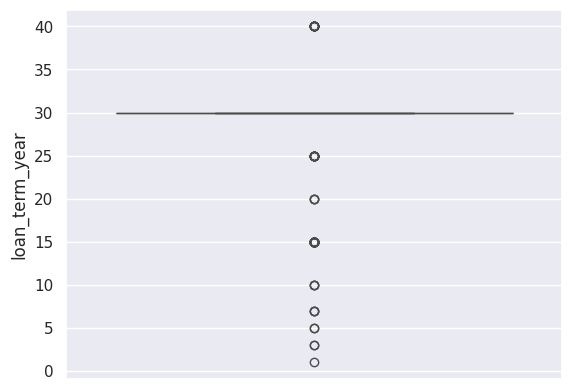

In [96]:
# kelompokan kolom numerik
numerik = ['applicant_income','coapplicant_income','loan_amount','loan_term_month','loan_term_year']

# visualisasi
for i in numerik:
  sns.boxplot(data=df, y=i)
  plt.show()

**Disini kami menemukan nilai outlier pada kolom-kolom numerik sehingga akan menggangu analisis kedepannya. Oleh karena itu, kami akan handling nilai outlier dengan metode IQR.**

In [97]:
# handling nilai outlier dengan metode IQR
cols_num = ['applicant_income', 'coapplicant_income', 'credit_history']

Q1 = df[cols_num].apply(np.quantile, q=0.25)
Q3 = df[cols_num].apply(np.quantile, q=0.75)

IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

# Filtering outliers
for col in cols_num:
    df = df.loc[(df[col] >= low_limit[col]) & (df[col] <= high_limit[col])]

# Menampilkan DataFrame setelah filtering
print(df)

      loan_id birth_date  gender married dependents     education  \
0    LP001002 1977-05-15    Male      No          0      Graduate   
1    LP001003 1979-08-24    Male     Yes          1      Graduate   
2    LP001005 1991-03-28    Male     Yes          0      Graduate   
3    LP001006 1980-06-02    Male     Yes          0  Not Graduate   
4    LP001008 1989-05-19    Male      No          0      Graduate   
..        ...        ...     ...     ...        ...           ...   
615  LP002974 1988-03-24    Male     Yes          0      Graduate   
616  LP002978 1976-03-25  Female      No          0      Graduate   
617  LP002979 1987-01-26    Male     Yes         3+      Graduate   
618  LP002983 1982-03-08    Male     Yes          1      Graduate   
619  LP002984 1986-12-05    Male     Yes          2      Graduate   

    self_employed  applicant_income  coapplicant_income  loan_amount  \
0              No            5849.0                 0.0       100000   
1              No          

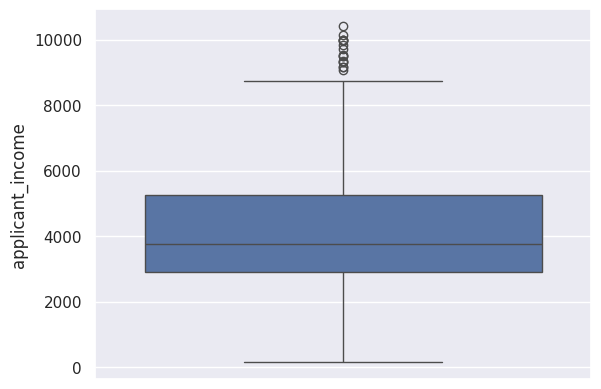

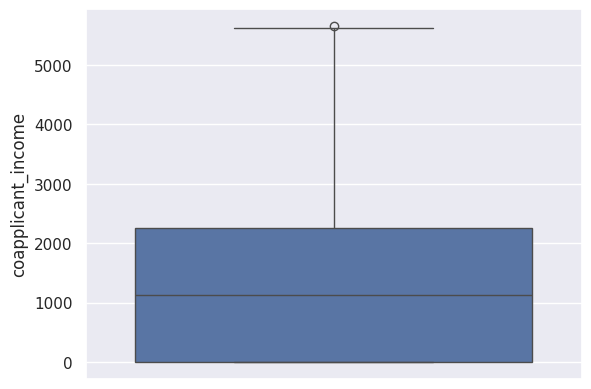

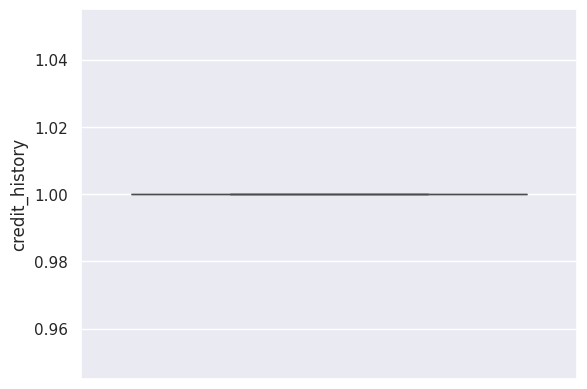

In [98]:
# validasi
for i in cols_num:
  sns.boxplot(data=df, y=i)
  plt.show()

## Feature Encoding

In [100]:
# copy data asli
df2 = df.copy()

In [101]:
# membuat fungsi untuk handling encod data kategorikal
def feature_encoding(data, variabel):
    # Inisiasi LabelEncoder pada variabel
    le = LabelEncoder()
    # apply pada tiap kolom
    data.loc[:, variabel] = le.fit_transform(data.loc[:, variabel])

In [102]:
# handling encod data kategorik
feature_encoding(df2,'gender')
feature_encoding(df2,'married')
feature_encoding(df2,'education')
feature_encoding(df2,'self_employed')
feature_encoding(df2,'property_type')
feature_encoding(df2,'loan_status')

In [103]:
# read data
df2.head()

,loan_id,birth_date,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,1,0,0,0,0,5849.0,0.0,100000,360,30,1,1,0
1,LP001003,1979-08-24,1,1,1,0,0,4583.0,1508.0,128000,360,30,1,2,1
2,LP001005,1991-03-28,1,1,0,0,1,3000.0,0.0,66000,360,30,1,1,0
3,LP001006,1980-06-02,1,1,0,1,0,2583.0,2358.0,120000,360,30,1,1,0
4,LP001008,1989-05-19,1,0,0,0,0,6000.0,0.0,141000,360,30,1,1,0


# Extraction

In [104]:
loan_term_year_group = {}
for i in range(1,41):
  if i < 15:
    loan_term_year_group[i] = '<15'
  elif i >=15 and 1 <= 25:
    loan_term_year_group[i] = '15-25'
  elif i == 30:
    loan_term_year_group[i] = '30'
  elif i > 30:
    loan_term_year_group[i] = '>30'
  else:
    pass

df['loan_term_year_group'] = df['loan_term_year'].replace(loan_term_year_group)

In [105]:
df.head()

,loan_id,birth_date,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status,loan_term_year_group
0,LP001002,1977-05-15,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1,house,APPROVE,15-25
1,LP001003,1979-08-24,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1,studio,REJECT,15-25
2,LP001005,1991-03-28,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1,house,APPROVE,15-25
3,LP001006,1980-06-02,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1,house,APPROVE,15-25
4,LP001008,1989-05-19,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1,house,APPROVE,15-25


# Business Insight

## Analisis Minat Pelanngan Berdasarkan Tipe Properti

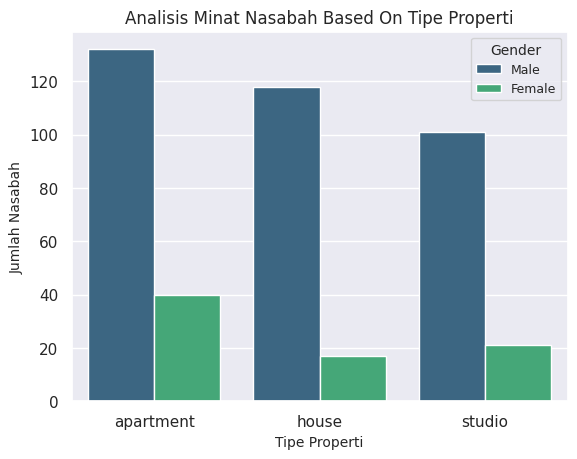

Jumlah Minat Nasabah Based on Tipe Properti
property_type
apartment    172
house        135
studio       122
Name: count, dtype: int64


In [106]:
ordered = df['property_type'].value_counts().sort_values(ascending = False).index
sns.countplot(data = df, x = 'property_type', order = ordered, palette = 'viridis', hue = 'gender')
plt.legend(title = 'Gender', labels = ['Male', 'Female'], title_fontsize = 10, fontsize = 9)
plt.title('Analisis Minat Nasabah Based On Tipe Properti', size = 12)
plt.xlabel('Tipe Properti', size = 10)
plt.ylabel('Jumlah Nasabah', size = 10)
plt.show()
print(f'Jumlah Minat Nasabah Based on Tipe Properti')
print(df['property_type'].value_counts())

In [107]:
df.groupby('gender').agg({'applicant_income' : 'mean', 'loan_amount' : 'mean', 'loan_term_year' : 'mean'})

,applicant_income,loan_amount,loan_term_year
gender,,,
Female,3983.910256,116730.769231,29.166667
Male,4296.111111,135310.541311,28.470085


**Insight** <br>
- 82% nasabah yang meminjam uang merupakan nasabah dengan gender male, hal itu dikarenakan male memiliki kebutuhan yang lebih tinggi daripada female.
- 38% nasabah dengan gender male memilih untuk berinvestasi pada apartment, 34% investasi untuk house, dan 30% memilih untuk investasi pada studio.



## Analisis Loan Status pelanggan berdasarkan pada tipe properti

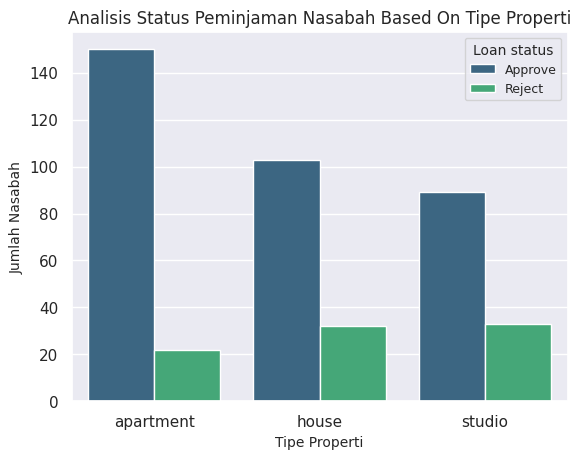

Jumlah Minat Nasabah Based on Tipe Properti
property_type
apartment    172
house        135
studio       122
Name: count, dtype: int64


In [108]:
ordered = df['property_type'].value_counts().sort_values(ascending = False).index
sns.countplot(data = df, x = 'property_type', order = ordered, palette = 'viridis', hue = 'loan_status')
plt.legend(title = 'Loan status', labels = ['Approve', 'Reject'], title_fontsize = 10, fontsize = 9)
plt.title('Analisis Status Peminjaman Nasabah Based On Tipe Properti', size = 12)
plt.xlabel('Tipe Properti', size = 10)
plt.ylabel('Jumlah Nasabah', size = 10)
plt.show()
print(f'Jumlah Minat Nasabah Based on Tipe Properti')
print(df['property_type'].value_counts())

In [124]:
df.groupby('property_type').agg({'applicant_income' : 'mean', 'loan_amount' : 'mean', 'loan_term_year' : 'mean'})

,applicant_income,loan_amount,loan_term_year
property_type,,,
apartment,4157.459302,134366.279070,28.883721
house,4170.733333,125814.814815,27.762963
studio,4430.721311,135270.491803,29.114754


**Insight** <br>
- 40% nasabah meminjam uang untuk membeli properti jenis apartemen.  Dimana 87% pinjaman diterima oleh pihak bank.  Apartment merupakan investasi jangka panjang yang menguntungkan. Apartemen dapat memberikan pengembalian investasi yang stabil dan terjamin melalui penyewaan properti. <br>
- Sedangkan nasabah yang meminjam uang untuk membeli house dan studio memiliki presentase reject yang tinggi diatas 25%, hal itu bisa dikarenakan nilai investasi jangka panjang yang kurang menguntungkan.

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

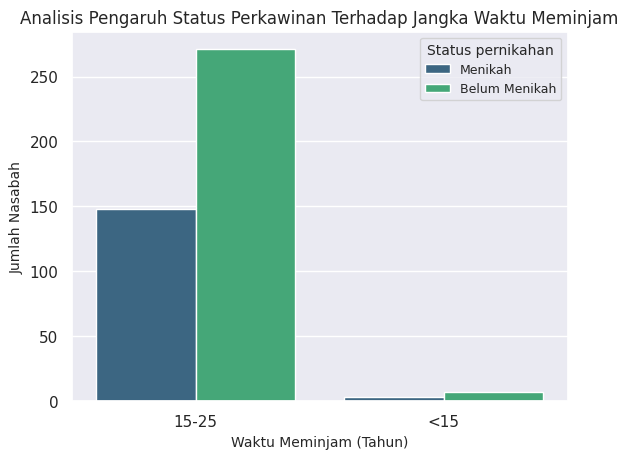

In [110]:
sns.countplot(data = df, x = 'loan_term_year_group', palette = 'viridis', hue = 'married')
plt.legend(title = 'Status pernikahan', labels = ['Menikah', 'Belum Menikah'], title_fontsize = 10, fontsize = 9)
plt.title('Analisis Pengaruh Status Perkawinan Terhadap Jangka Waktu Meminjam', size = 12)
plt.xlabel('Waktu Meminjam (Tahun)', size = 10)
plt.ylabel('Jumlah Nasabah', size = 10)
plt.show()

In [125]:
df.groupby('married').agg({'loan_term_year' : 'mean', 'applicant_income' : 'mean', 'coapplicant_income' : 'mean', 'loan_amount' : 'mean'})

,loan_term_year,applicant_income,coapplicant_income,loan_amount
married,,,,
No,29.211921,4280.688742,800.801325,119728.476821
Yes,28.262590,4216.892086,1609.550072,138561.151079


**Insight** <br>
- 73% nasabah yang sudah berkeluarga berpotensi untuk diapprove dikarenakan rata-rata jangka waktu pengembalian pinjaman yaitu 28 tahun dan nasabah ini memiliki coapplicant income yang lebih tinggi.<br>
- Sedangkan nasabah yang belum berkeluarga 38% direject pinjamannya dikarenakan rata-rata jangka waktu pengembalian pinjaman yaitu 29 tahun dan nasabah ini memiliki applicant income yang lebih rendah.

# Conclusion

Karakteristik dan behaviour nasabah yang melakukan pinjaman
1. 40% nasabah yang meminjam uang akan digunakan untuk membeli apartment, 32% untuk membeli rumah, dan 28% untuk membeli studio.
2. 87% nasabah yang akan membeli apartment di approve pinjamannya, 76% di approve untuk membeli rumah, dan 73% di approve untuk membeli studio.
3. Nasabah yang sudah berkeluarga rata-rata jangka waktu pengembalian pinjamannya 28 tahun sedangkan nasabah yang belum berkeluarga rata-rata 29 tahun.
4. Status pinjaman yang di approve, rata-rata nasabah dengan jangka waktu pengembalian pinjamannya 28 tahun, applicant income 4224.12 dan jumlah pinjaman sebesar 130865.49
5. Sedangkan status pinjaman yang di reject, rata-rata nasabah dengan jangka waktu pengembalian pinjamannya 29 tahun, applicant income 4299.18 dan jumlah pinjaman sebesar 136126.43